# Image Classification using `CIFAR-10` dataset

### Import certain libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

### Download & prepare the `CIFAR-10` dataset

*   The CIFAR10 dataset contains **60,000 color images** in `10 classes`, with `6,000 images` in each class.
*   Dataset is divided into **50,000 training images** and **10,000 testing** images.
*   Classes are mutually exclusive and there is no overlap between them
*   There is no overlap between `automobiles` and `trucks`. Truck class contains only `big` trucks

In [ ]:
print('Testing set is just:', round(10000/60000*100, 2), '%')

Testing set is just: 16.67 %


In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() #load the CIFAR-10 data as train and test sets

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
train_images.ndim

4

### Understanding `training dataset`

In [ ]:
print("Shape of train images:", train_images.shape)
print("Shape of train labels:", train_labels.shape)

Shape of train images: (50000, 32, 32, 3)
Shape of train labels: (50000, 1)


In [ ]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
train_labels[0]

array([6], dtype=uint8)

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Select one image randomly from the `training images` set & visualize

In [ ]:
image = train_images[12] #13th image out of 50000 images

### Extract the R, G, B channels
R = image[:, :, 0] # to extract one of the color channels from a color image --> RED
G = image[:, :, 1] # to extract one of the color channels from a color image --> GREEN
B = image[:, :, 2] # to extract one of the color channels from a color image --> BLUE

In [ ]:
print(R)

[[164 162 162 ... 157 153 153]
 [168 166 166 ... 164 160 158]
 [172 170 171 ... 168 165 163]
 ...
 [123 117 112 ... 117  95 120]
 [120 116 112 ... 126 120 120]
 [121 120 116 ... 124 124 120]]


In [ ]:
print("Shape of the RED channel:", R.shape)

Shape of the RED channel: (32, 32)


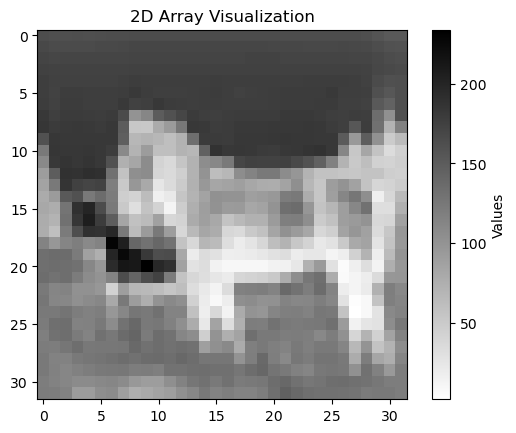

In [ ]:
### Visualize the 2D array as a heatmap
plt.imshow(R, cmap='binary', interpolation='none')
plt.colorbar(label = 'Values')
plt.title("2D Array Visualization")
plt.show()

- Looks like a `horse` in the form of `32 X 32` pixelated values

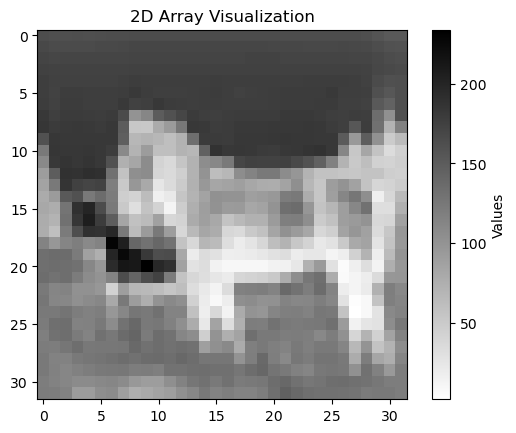

In [ ]:
### Visualize the 2D array as a heatmap
plt.imshow(R, cmap='binary', interpolation='none')
plt.colorbar(label = 'Values')
plt.title("2D Array Visualization")
plt.show()

### Display the original image along the `RGB` channels

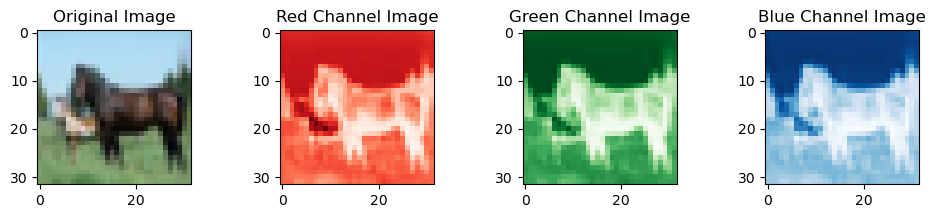

In [ ]:
### Setting the Canvas ready
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 2))

### Original Image
axs[0].imshow(image)
axs[0].set_title("Original Image")

### Red Channel Image
axs[1].imshow(R, cmap = 'Reds')
axs[1].set_title("Red Channel Image")

### Green Channel Image
axs[2].imshow(G, cmap = 'Greens')
axs[2].set_title("Green Channel Image")

### Blue Channel Image
axs[3].imshow(B, cmap = 'Blues')
axs[3].set_title("Blue Channel Image")

plt.show()

In [ ]:
image = train_images[0] #the very first image out of 50000 images

### Extract the R, G, B channels
R = image[:, :, 0] # to extract one of the color channels from a color image --> RED
G = image[:, :, 1] # to extract one of the color channels from a color image --> GREEN
B = image[:, :, 2] # to extract one of the color channels from a color image --> BLUE

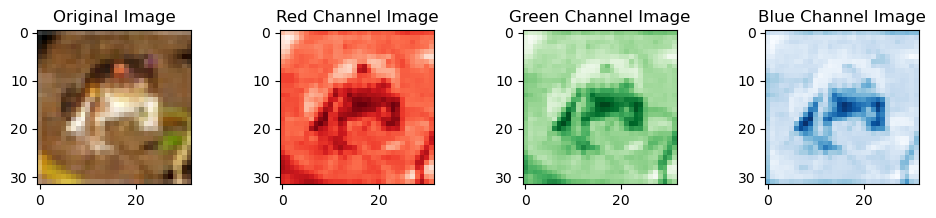

In [ ]:
### Setting the Canvas ready
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (12, 2))

### Original Image
axs[0].imshow(image)
axs[0].set_title("Original Image")

### Red Channel Image
axs[1].imshow(R, cmap = 'Reds')
axs[1].set_title("Red Channel Image")

### Green Channel Image
axs[2].imshow(G, cmap = 'Greens')
axs[2].set_title("Green Channel Image")

### Blue Channel Image
axs[3].imshow(B, cmap = 'Blues')
axs[3].set_title("Blue Channel Image")

plt.show()

### Let us plot a few more but with this time `label` tagged

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

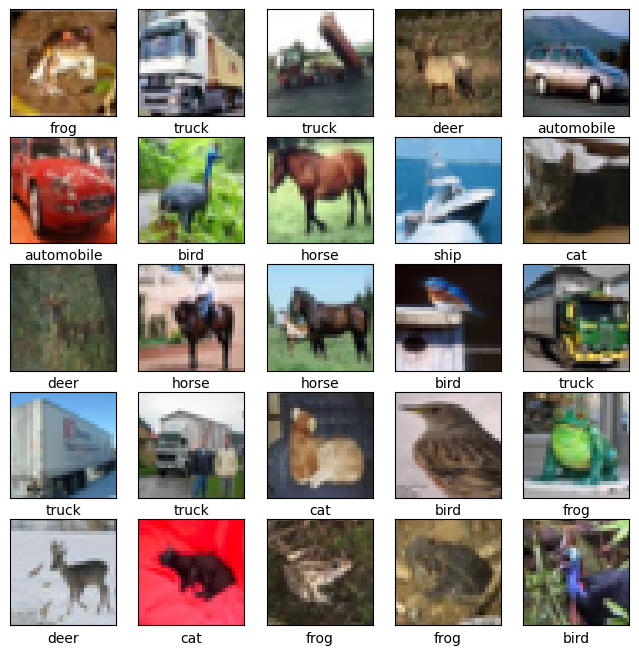

In [ ]:
plt.figure(figsize = (8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # plot the images from 0 till 24
    plt.xlabel(class_names[train_labels[i][0]]) #tag the class label to the respective image
plt.show()

### Let us also plot a few of `testing images` as well

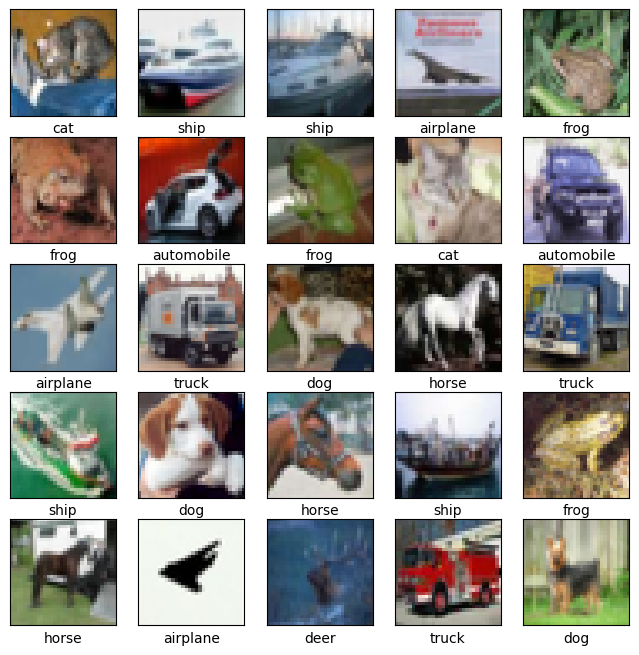

In [ ]:
plt.figure(figsize = (8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i]) # plot the images from 0 till 24
    plt.xlabel(class_names[test_labels[i][0]]) #tag the class label to the respective image
plt.show()

### Let us plot shuffled testing images

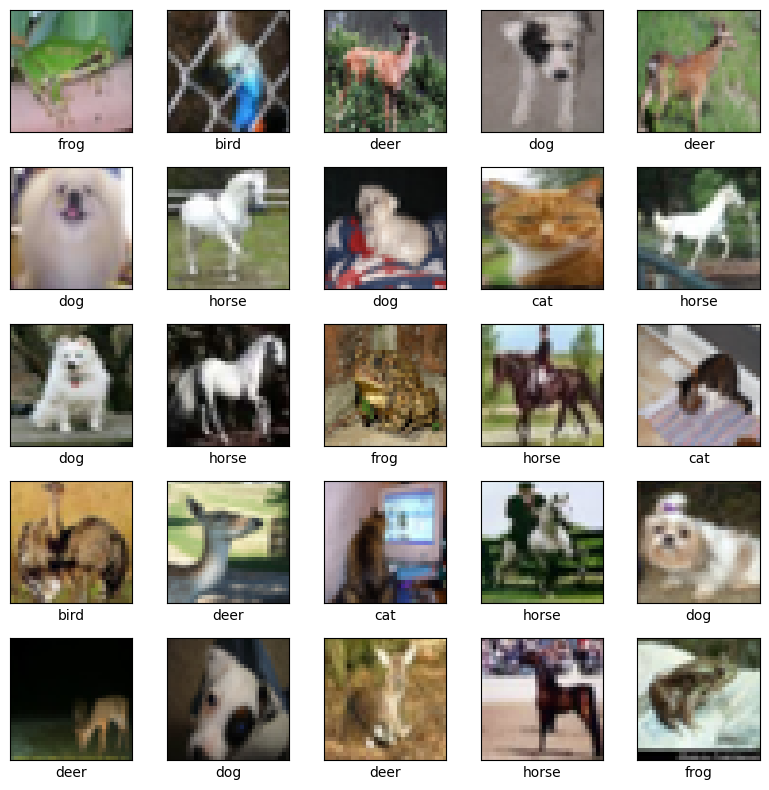

In [ ]:
plt.figure(figsize = (8,8))

### Pick random/shuffled 25 images without replacement
random_idx = np.random.choice(len(test_images), size=25, replace=False)

for plot_i , idx in enumerate(random_idx):
    plt.subplot(5, 5, plot_i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx]) # plot the images from 0 till 24
    plt.xlabel(class_names[test_labels[idx][0]]) #tag the class label to the respective image
plt.tight_layout()
plt.show()

In [ ]:
random_idx = np.random.choice(len(test_images), size=25, replace=False)
random_idx

array([6215, 4106, 5358, 5988, 5093, 2336, 2054, 4824, 1389, 1705, 2259,
       7850,  714,  743, 3132,   90, 2930, 8156, 3652, 1280, 6577,  724,
       7125, 1540, 5159])

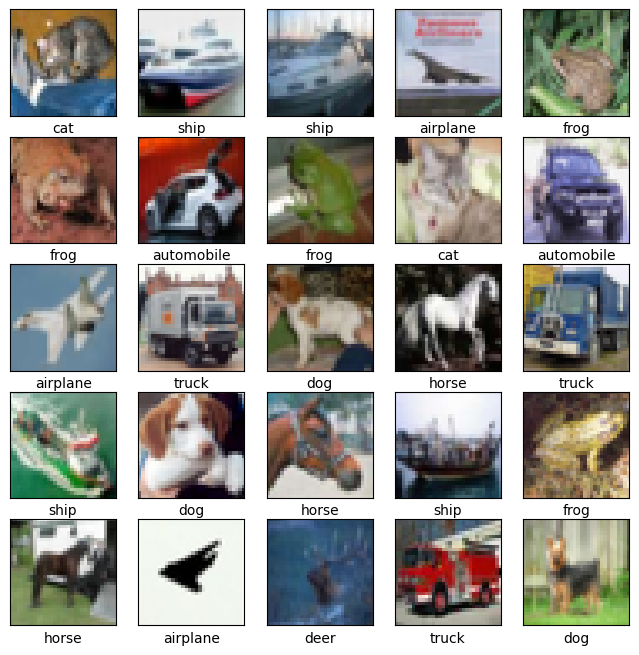

In [ ]:
plt.figure(figsize = (8,8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i]) # plot the images from 0 till 24
    plt.xlabel(class_names[test_labels[i][0]]) #tag the class label to the respective image
plt.show()

## Let us create `BASE` Convolutional Neural Network

`Conv1D` is used for the text

**`Conv2D` is used for the images**

`Conv3D` is used for the videos//motion --> `MRI & CT Analysis`

In [ ]:
model = models.Sequential() # placeholder for the model object called `model`

In [ ]:
model

<Sequential name=sequential, built=False>

In [ ]:
### Adding the first convolution layer (filter layer on top of the input images), followed by pooling
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3))) #added a Conv2D layer having 32 filters having filter (kernel) size: 3 x 3...on top of colorful RGB image havign size (32 x 32)
model.add(layers.MaxPool2D((2,2))) #adds a Max Pooling layer with pool size of 2 x 2 --> to reduce the spatial dimensions --> by half

### Adding the second convolution layer (filter layer on top of the input images), followed by pooling
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) #added a Conv2D layer having 64 filters having filter (kernel) size: 3 x 3
model.add(layers.MaxPool2D((2,2))) #adds a Max Pooling layer with pool size of 2 x 2 --> to reduce the spatial dimensions --> by half

### Adding the third convolution layer --> just the convolution no pooling
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) #added a 2D Convolution layer with 64 filters having filter size: 3 X 3

C:\Users\think\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

### Let us add `ANN` block on top of the above `CNN` block

In [ ]:
model.add(layers.Flatten()) # convert a multi-dimensional input coming from CNN into a 1D vector
model.add(layers.Dense(64, activation='relu')) # a layer with 64 neurons and applying a Relu activation
model.add(layers.Dense(10)) #final fully-connected layer with neurons as it is the output layer of the model to predict 10 different categories

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

- Even a simple `standard` CNN architecture for CIFAR-10 dataset needs to go through training of `122,570` (~**122.5K**) parameters

### Compile and train the model

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True), #Output layer me activation='softmax' nahi diya, to model raw logits deta hai.
              #Tab from_logits=True rakhne se SparseCategoricalCrossentropy khud hi Softmax apply kar leta hai loss compute karne se pehle.
              metrics = ['accuracy']
             )

In [ ]:
history = model.fit(train_images, train_labels, epochs = 50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.2194 - loss: 3.4916 - val_accuracy: 0.4404 - val_loss: 1.5155
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4729 - loss: 1.4468 - val_accuracy: 0.5097 - val_loss: 1.4296
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.5582 - loss: 1.2407 - val_accuracy: 0.5696 - val_loss: 1.2284
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6090 - loss: 1.1088 - val_accuracy: 0.6033 - val_loss: 1.1590
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.6475 - loss: 1.0055 - val_accuracy: 0.6119 - val_loss: 1.1222
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6731 - loss: 0.9355 - val_accuracy: 0.6546 - val_loss: 1.0340
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.6951 - loss: 0.8743 - val_accuracy: 0.6435 - val_loss: 1.0449
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7105 - 

### Capturing the performance of the `base` CNN model

- epochs: `50`
- training accuracy: `91.2%`
- valdiation accuracy: `64.3%`

-- Conclusion: Model seems to be `highly overfit`

### `Fine-tuning the `Base CNN Model`

#### `Technique #1:` -> `BATCH NORMALIZATION`

In [ ]:
del model

In [ ]:
model = models.Sequential() # placeholder for the model object called `model`

In [ ]:
### Adding the first convolution layer (filter layer on top of the input images), followed by pooling
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3))) #added a Conv2D layer having 32 filters having filter (kernel) size: 3 x 3...on top of colorful RGB image havign size (32 x 32)

### Adding the batch normalization after first convolution layer
model.add(layers.BatchNormalization()) #normalizes the output of the convolution layer

### First pooling layer
model.add(layers.MaxPool2D((2,2))) #adds a Max Pooling layer with pool size of 2 x 2 --> to reduce the spatial dimensions --> by half

### Adding the second convolution layer (filter layer on top of the input images), followed by pooling
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) #added a Conv2D layer having 64 filters having filter (kernel) size: 3 x 3

### Adding the batch normalization after second convolution layer
model.add(layers.BatchNormalization()) #normalizes the output of the convolution layer

### Second pooling layer
model.add(layers.MaxPool2D((2,2))) #adds a Max Pooling layer with pool size of 2 x 2 --> to reduce the spatial dimensions --> by half

### Adding the third convolution layer --> just the convolution no pooling
model.add(layers.Conv2D(64, (3,3), activation = 'relu')) #added a 2D Convolution layer with 64 filters having filter size: 3 X 3

### Let us add `ANN` block on top of the above `CNN` block

In [ ]:
model.add(layers.Flatten()) # convert a multi-dimensional input coming from CNN into a 1D vector
model.add(layers.Dense(64, activation='relu')) # a layer with 64 neurons and applying a Relu activation
model.add(layers.Dense(10)) #final fully-connected layer with neurons as it is the output layer of the model to predict 10 different categories

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,954 (480.29 KB)

 Trainable params: 122,762 (479.54 KB)

 Non-trainable params: 192 (768.00 B)

### Compile and train the model

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy']
             )

In [ ]:
history = model.fit(train_images, train_labels, epochs = 50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.4397 - loss: 1.5567 - val_accuracy: 0.6135 - val_loss: 1.0950
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6499 - loss: 0.9971 - val_accuracy: 0.6234 - val_loss: 1.1122
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7106 - loss: 0.8231 - val_accuracy: 0.6664 - val_loss: 0.9838
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7550 - loss: 0.6999 - val_accuracy: 0.6818 - val_loss: 0.9417
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7827 - loss: 0.6144 - val_accuracy: 0.6704 - val_loss: 1.0036
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8009 - loss: 0.5625 - val_accuracy: 0.6897 - val_loss: 0.9762
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8222 - loss: 0.4977 - val_accuracy: 0.7268 - val_loss: 0.8283
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8442 -

KeyboardInterrupt: 

### Capturing the performance of the `base` CNN model after `adding batch normalization`:

- epochs: `50`
- training accuracy: `98%`
- valdiation accuracy: `71.3%`

-- Conclusion: Training accuracy has improved slightly over the base model however the model seems to be `highly overfit`

#### `Technique #2:` -> `BATCH NORMALIZATION` + `DROPOUT` + `REGULARIZATION`

In [ ]:
del model

In [ ]:
from tensorflow.keras.regularizers import l2 #Ridge Regularization)

In [ ]:
model = models.Sequential() # placeholder for the model object called `model`

In [ ]:
### Adding the first convolution layer (filter layer on top of the input images), followed by pooling
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3))) #added a Conv2D layer having 32 filters having filter (kernel) size: 3 x 3...on top of colorful RGB image havign size (32 x 32)

### Adding the batch normalization after first convolution layer
model.add(layers.BatchNormalization()) #normalizes the output of the convolution layer

### First pooling layer
model.add(layers.MaxPool2D((2,2))) #adds a Max Pooling layer with pool size of 2 x 2 --> to reduce the spatial dimensions --> by half

### Dropout Layer
model.add(layers.Dropout(0.25)) #dropping out 25% of the neurons #Randomly drop 25% neurons each training batch

### Adding the second convolution layer (filter layer on top of the input images) with regulariztion
model.add(layers.Conv2D(64, (3,3), activation = 'relu', kernel_regularizer=l2(0.01))) #added a Conv2D layer having 64 filters having filter (kernel) size: 3 x 3

### Adding the batch normalization after second convolution layer
model.add(layers.BatchNormalization()) #normalizes the output of the convolution layer

### Second pooling layer
model.add(layers.MaxPool2D((2,2))) #adds a Max Pooling layer with pool size of 2 x 2 --> to reduce the spatial dimensions --> by half

### Dropout Layer
model.add(layers.Dropout(0.25)) #dropping out 25% of the neurons

### Adding the third convolution layer with regularizer--> just the convolution no pooling
model.add(layers.Conv2D(64, (3,3), activation = 'relu', kernel_regularizer=l2(0.01))) #added a 2D Convolution layer with 64 filters having filter size: 3 X 3

C:\Users\think\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Let us add `ANN` block on top of the above `CNN` block

In [ ]:
model.add(layers.Flatten()) # convert a multi-dimensional input coming from CNN into a 1D vector
model.add(layers.Dense(64, activation='relu')) # a layer with 64 neurons and applying a Relu activation
model.add(layers.Dense(10)) #final fully-connected layer with neurons as it is the output layer of the model to predict 10 different categories

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,954 (480.29 KB)

 Trainable params: 122,762 (479.54 KB)

 Non-trainable params: 192 (768.00 B)

### Compile and train the model

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              metrics = ['accuracy']
             )

In [ ]:
history2 = model.fit(train_images, train_labels, epochs = 50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.3931 - loss: 2.2868 - val_accuracy: 0.4943 - val_loss: 1.5989
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5934 - loss: 1.3626 - val_accuracy: 0.5019 - val_loss: 1.6491
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6413 - loss: 1.2537 - val_accuracy: 0.5275 - val_loss: 1.6207
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6631 - loss: 1.1940 - val_accuracy: 0.6497 - val_loss: 1.2400
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6769 - loss: 1.1542 - val_accuracy: 0.5383 - val_loss: 1.6648
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6908 - loss: 1.1217 - val_accuracy: 0.6291 - val_loss: 1.3379
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6908 - loss: 1.1192 - val_accuracy: 0.4595 - val_loss: 2.1570
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6978 -

### Capturing the performance of the `base` CNN model after `adding **batch normalization**,  **Dropout** ,  **Regularization**:

- epochs: `50`
- training accuracy: `77%`
- valdiation accuracy: `73%`

-- Conclusion: Training accuracy is decent after iterating 2nd time and the good news is that the model seems to e robust and **not** overfit`

### Plotting the `acccuracy vs epoch` chart for `training` and `validation` set

history2.history → Dictionary of metrics

'loss'

'accuracy'

'val_loss'

'val_accuracy'

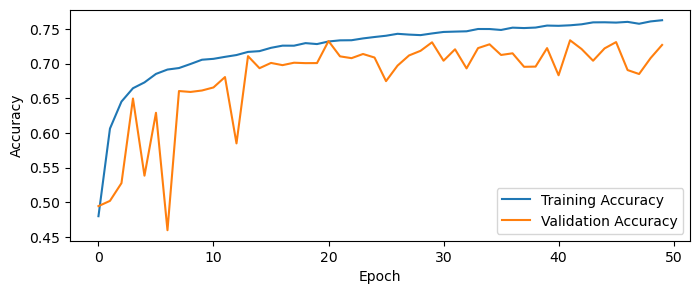

In [ ]:
plt.figure(figsize = (8,3))

plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
history3 = model.fit(train_images, train_labels, epochs = 100, validation_data=(test_images, test_labels))

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7685 - loss: 0.8767 - val_accuracy: 0.6996 - val_loss: 1.0976
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7651 - loss: 0.8819 - val_accuracy: 0.7262 - val_loss: 1.0141
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7679 - loss: 0.8835 - val_accuracy: 0.7331 - val_loss: 0.9978
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.7706 - loss: 0.8674 - val_accuracy: 0.7205 - val_loss: 1.0296
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7681 - loss: 0.8741 - val_accuracy: 0.7342 - val_loss: 0.9968
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.7679 - loss: 0.8755 - val_accuracy: 0.7340 - val_loss: 0.9951
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7685 - loss: 0.8722 - val_accuracy: 0.7350 - val_loss: 0.9869
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 

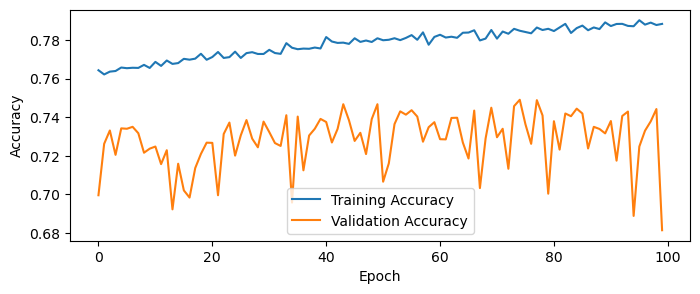

In [ ]:
plt.figure(figsize = (8,3))

plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()